#######################################################################################################################################
### Fichier : BDD_des_accidents_corporel_de_2015_à_2020.ipynb
#######################################################################################################################################

Ce fichier contient les données des accidents corporels de 2015 à 2020. Il se base sur 6 fichiers csv qui sont les suivants : ***2015.csv, 2016.csv, 2017.csv, 2018.csv, 2019.csv, 2020.csv.***

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px

plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
# fpour lire les fichiers de 2015 à 2020
# et les concaténer dans un seul dataframe
from operator import ne

for i in range(2015, 2021):
  if i == 2015:
    df = pd.read_csv(f"./data/{i}.csv", sep=";")
  else:
    df = pd.concat([df, pd.read_csv(f"./data/{i}.csv", sep=";")])

new_df = df.loc[:, ['Année', 'Lieu Admin Actuel - Territoire Nom', 'Type Accident - Libellé', 'Catégorie véhicule', 'Age véhicule']]
# fusionner les lignes Moto lourde, légère et Cyclo  dans moto, 
# et les lignes indeterminable et non renseigné dans autre
new_df['Catégorie véhicule'] = new_df['Catégorie véhicule'].replace({'Moto lourde': 'Moto', 'Moto légère': 'Moto', 'Cyclo': 'Moto', 'Indéterminable': 'Autres'})

In [3]:
# obtenir le nombre d'accidents par age de la voiture en utilisant le groupby et le sort_values
accident_par_age_vehicule = (new_df.groupby('Age véhicule')['Age véhicule'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)

# new_df.groupby('Age véhicule').size()
top10_accident_par_age_vehicule = accident_par_age_vehicule.head(10)

Nombre d'accident par âge du véhicule de 2015 à 2020

In [4]:
# accident par age du véhicule par année
accident_par_age_vehicule_par_annee = new_df.groupby(['Année', 'Age véhicule']).size().reset_index(name="Nombre d'accident").sort_values(["Age véhicule"], ascending=True)
# accident par age du véhicule par année en utilisant matplotlib et numpy

Accident par age du véhicule par année de 2015 à 2020

In [5]:
data_0_3 = accident_par_age_vehicule_par_annee[accident_par_age_vehicule_par_annee['Age véhicule'] <= 3]
data_4_10 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 3) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 10)]
data_11_20 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 10) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 20)]

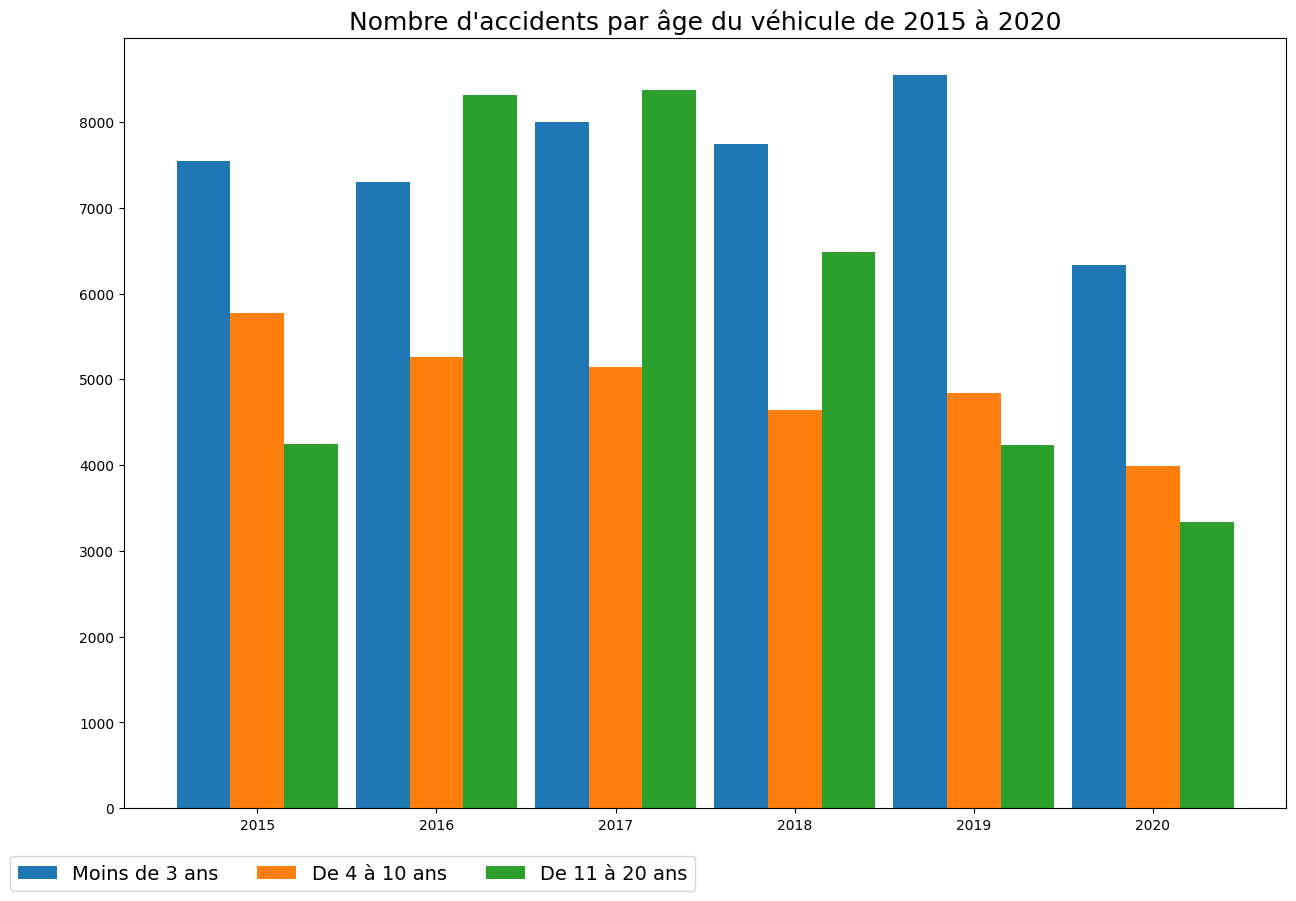

In [6]:
barWidth = 0.3
# creation de la bar Data_0_3
plt.bar(data_0_3['Année']-0.3, data_0_3['Nombre d\'accident'], label='Moins de 3 ans', width=barWidth)
# afficher les valeur des barres sur le graphique pour data_0_3

# creation de la bar Data_4_10
plt.bar(data_4_10['Année'], data_4_10['Nombre d\'accident'], label='De 4 à 10 ans', width=barWidth)
# creation de la bar Data_11_20
plt.bar(data_11_20['Année']+0.3, data_11_20['Nombre d\'accident'], label='De 11 à 20 ans', width=barWidth)

plt.title('Nombre d\'accidents par âge du véhicule de 2015 à 2020', fontsize=18)

# ppour chaque bar on affiche le nombre d'accident
# afficher la légende du graphique à l'extérieur du graphique

plt.legend(fontsize=14, bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()

Accident par type de véhicule par année de 2015 à 2020

In [7]:
accident_par_type_vehicule_par_annee = (new_df.groupby(['Année', 'Catégorie véhicule'])['Catégorie véhicule'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)

Accident par térritoire

In [8]:
accident_par_territoire_par_annee = (new_df.groupby(['Année', 'Lieu Admin Actuel - Territoire Nom'])['Lieu Admin Actuel - Territoire Nom'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)

Accident par type d'accident

In [9]:
# Les accidents par type d'accident par année
accident_par_type_accident_par_annee = (new_df.groupby(['Année', 'Type Accident - Libellé'])['Type Accident - Libellé'].count()).reset_index(name='nombre').sort_values(['Année'], ascending=False)

#######################################################################################################################################
### Fichier : charts_cambriolage_violence_vol.ipynb
#######################################################################################################################################

Ce fichier contient les données des cambriolages, des vols et des violences de 2010 à 2018. Il se base sur 1 fichier xlsx qui est le suivant : ***indicateur_victimation_et_insécurité.xlsx***

In [10]:
df = pd.read_excel('data/indicateur_victimation_et_insécurité.xlsx', engine='openpyxl', skiprows=7, nrows=19)

In [11]:
getYears = df[['INDICATEURS/PERIODE', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

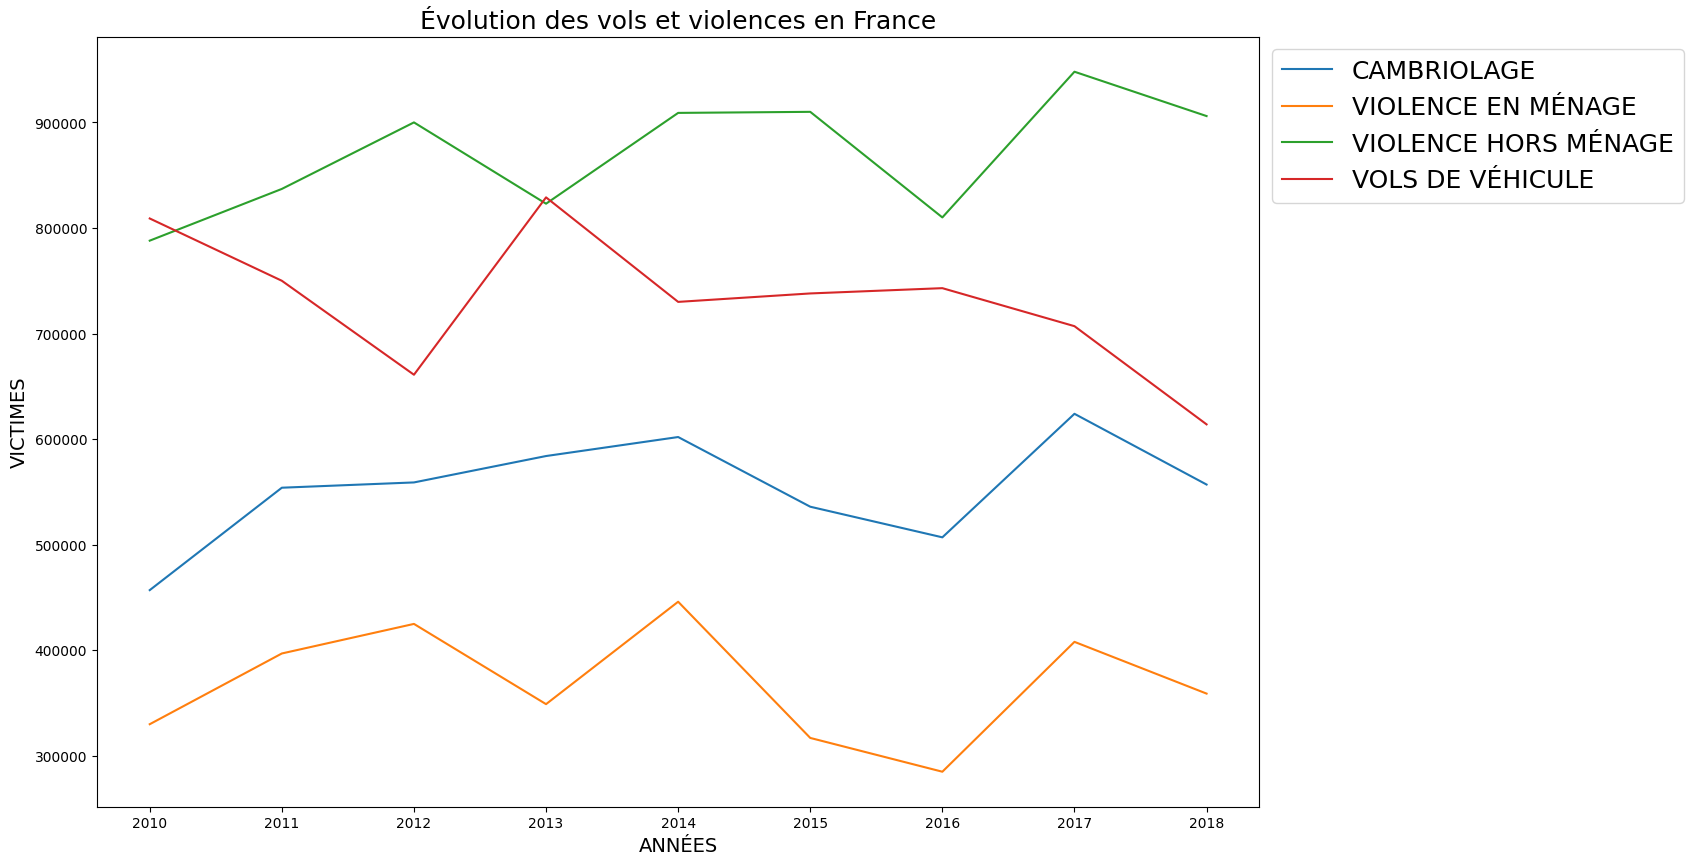

In [12]:
robbery = getYears.iloc[0]
robbery = pd.DataFrame(robbery)
robbery.columns = robbery.iloc[0]
robbery = robbery[1:]



violenceAtHome = getYears.iloc[13]
violenceAtHome = pd.DataFrame(violenceAtHome)
violenceAtHome.columns = violenceAtHome.iloc[0]
violenceAtHome = violenceAtHome[1:]

violenceOutdoor = getYears.loc[[11, 12]]
violenceOutdoor = pd.Series(violenceOutdoor[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())


carjacking = getYears.loc[[3, 4, 5]]
carjacking = pd.Series(carjacking[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())

plt.plot(robbery)
plt.plot(violenceAtHome)
plt.plot(violenceOutdoor)
plt.plot(carjacking)

plt.title('Évolution des vols et violences en France', fontsize=18)
plt.xlabel('ANNÉES', fontsize=14)
plt.ylabel('VICTIMES', fontsize=14)
plt.legend(["CAMBRIOLAGE", "VIOLENCE EN MÉNAGE", "VIOLENCE HORS MÉNAGE", "VOLS DE VÉHICULE"], bbox_to_anchor=(1,1), fontsize=18)
plt.show()

#######################################################################################################################################
### Fichier : falsification.ipynb
#######################################################################################################################################

Ce fichier contient les données des falsifications de 2015 à 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [13]:
# Read the excel file
data_raw = pd.read_excel("data/crimes_mensuels.xlsx", sheet_name="France_Entière")

In [14]:
falsifications_i89i90i91 = data_raw.loc[88:90, '_2021_12':'_2015_01']

# reversing the dataframe
falsifications_i89i90i91 = falsifications_i89i90i91[falsifications_i89i90i91.columns[::-1]]

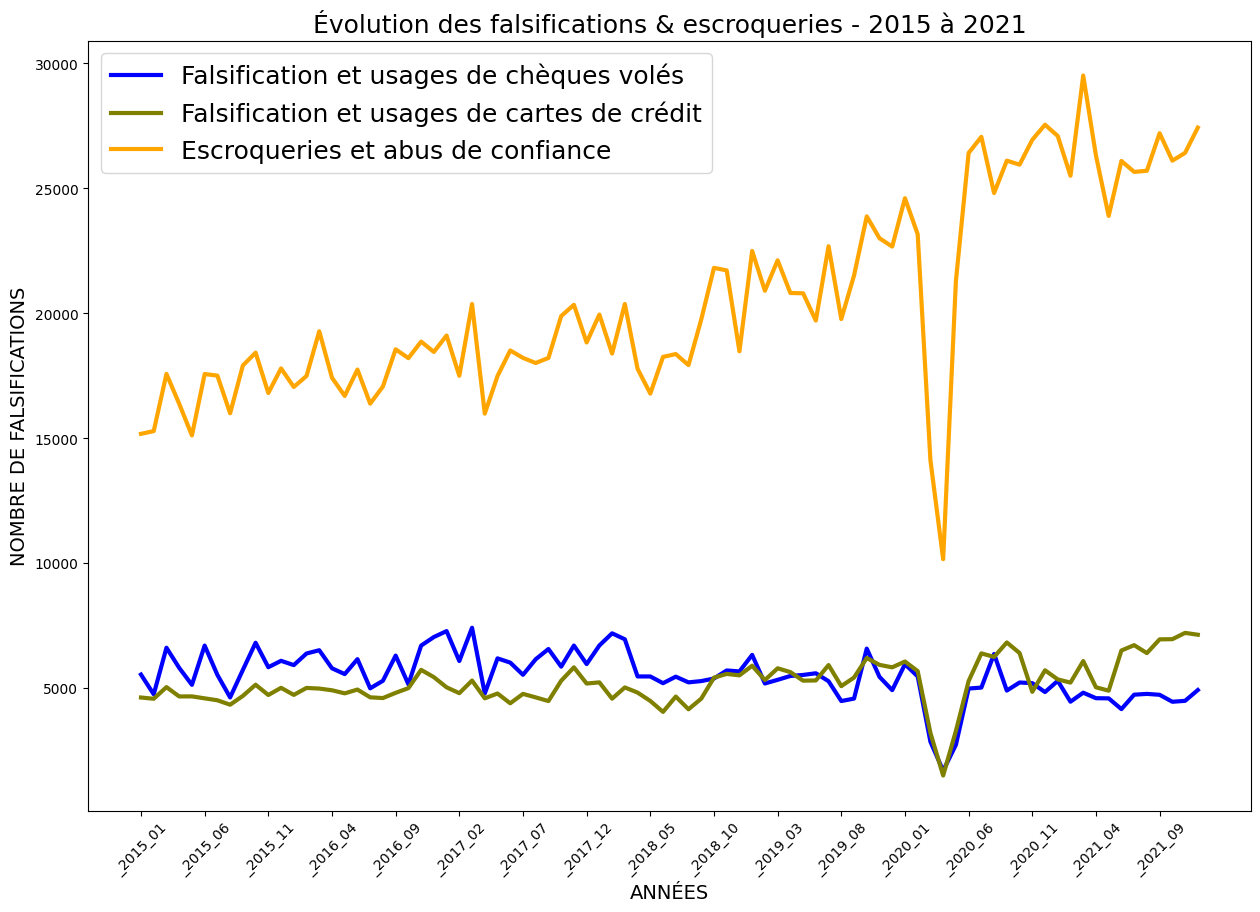

In [15]:
# dataframe for plots
row90 = falsifications_i89i90i91.iloc[2]
row89 = falsifications_i89i90i91.iloc[1]
row88 = falsifications_i89i90i91.iloc[0]

df = pd.DataFrame({
  'period': row88.index,
  'Falsification et usages de chèques volés': row88.values,
  'Falsification et usages de cartes de crédit': row89.values,
  'Escroqueries et abus de confiance': row90.values
})

# multiple line plots
plt.plot( 'period', 'Falsification et usages de chèques volés', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.plot( 'period', 'Falsification et usages de cartes de crédit', data=df, marker='', markersize=12, color='olive', linewidth=3)
plt.plot( 'period', 'Escroqueries et abus de confiance', data=df, marker='', markersize=12, color='orange', linewidth=3)

# title, ticks
plt.title("Évolution des falsifications & escroqueries - 2015 à 2021", fontsize=18)
plt.xticks(np.arange(0, row88.index.size, 5), rotation=45)
plt.ylabel('NOMBRE DE FALSIFICATIONS', fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(fontsize=18)

# show graph
plt.show()

#######################################################################################################################################
### Fichier : faux_documents.ipynb
#######################################################################################################################################

Ce fichier contient les données des faux documents de 2015 à 2021, ainsi que les chiffres concernant les accidents de la route de 2020 avec des automobilistes qui possèdent ou non un permis de conduire. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [16]:
df = pd.read_excel('./data/crimes_mensuels.xlsx', 'France_Entière')

In [17]:
df_80_2021 = df.loc[80, '_2021_12' : '_2021_01']
df_80_2020 = df.loc[80, '_2020_12' : '_2020_01']
df_80_2019 = df.loc[80, '_2019_12' : '_2019_01']
df_80_2018 = df.loc[80, '_2018_12' : '_2018_01']
df_80_2017 = df.loc[80, '_2017_12' : '_2017_01']
df_80_2016 = df.loc[80, '_2016_12' : '_2016_01']
df_80_2015 = df.loc[80, '_2015_12' : '_2015_01']

df_81_2021 = df.loc[81, '_2021_12' : '_2021_01']
df_81_2020 = df.loc[81, '_2020_12' : '_2020_01']
df_81_2019 = df.loc[81, '_2019_12' : '_2019_01']
df_81_2018 = df.loc[81, '_2018_12' : '_2018_01']
df_81_2017 = df.loc[81, '_2017_12' : '_2017_01']
df_81_2016 = df.loc[81, '_2016_12' : '_2016_01']
df_81_2015 = df.loc[81, '_2015_12' : '_2015_01']

df_82_2021 = df.loc[82, '_2021_12' : '_2021_01']
df_82_2020 = df.loc[82, '_2020_12' : '_2020_01']
df_82_2019 = df.loc[82, '_2019_12' : '_2019_01']
df_82_2018 = df.loc[82, '_2018_12' : '_2018_01']
df_82_2017 = df.loc[82, '_2017_12' : '_2017_01']
df_82_2016 = df.loc[82, '_2016_12' : '_2016_01']
df_82_2015 = df.loc[82, '_2015_12' : '_2015_01']

In [18]:
dfObj = pd.DataFrame(columns = ['Label', 'Sums_2021', 'Sums_2020', 'Sums_2019', 'Sums_2018', 'Sums_2017', 'Sums_2016', 'Sums_2015'])

In [19]:
dfObj = dfObj.append({
  'Label': 'Faux documents d\'identité', 
  'Sums_2021': df_80_2021.sum(),
  'Sums_2020': df_80_2020.sum(),
  'Sums_2019': df_80_2019.sum(),
  'Sums_2018': df_80_2018.sum(),
  'Sums_2017': df_80_2017.sum(),
  'Sums_2016': df_80_2016.sum(),
  'Sums_2015': df_80_2015.sum(),
}, ignore_index = True)

dfObj = dfObj.append({
  'Label': 'Faux documents de véhicule', 
  'Sums_2021': df_81_2021.sum(),
  'Sums_2020': df_81_2020.sum(),
  'Sums_2019': df_81_2019.sum(),
  'Sums_2018': df_81_2018.sum(),
  'Sums_2017': df_81_2017.sum(),
  'Sums_2016': df_81_2016.sum(),
  'Sums_2015': df_81_2015.sum(),
}, ignore_index = True)

dfObj = dfObj.append({
  'Label': 'Faux documents administratifs', 
  'Sums_2021': df_82_2021.sum(),
  'Sums_2020': df_82_2020.sum(),
  'Sums_2019': df_82_2019.sum(),
  'Sums_2018': df_82_2018.sum(),
  'Sums_2017': df_82_2017.sum(),
  'Sums_2016': df_82_2016.sum(),
  'Sums_2015': df_82_2015.sum(),
}, ignore_index = True)

In [20]:
labels = [2021, 2020, 2019, 2018, 2017, 2016, 2015]
values_80 = [df_80_2021.sum(), df_80_2020.sum(), df_80_2019.sum(), df_80_2018.sum(), df_80_2017.sum(), df_80_2016.sum(), df_80_2015.sum()]
values_81 = [df_81_2021.sum(), df_81_2020.sum(), df_81_2019.sum(), df_81_2018.sum(), df_81_2017.sum(), df_81_2016.sum(), df_81_2015.sum()]
values_82 = [df_82_2021.sum(), df_82_2020.sum(), df_82_2019.sum(), df_82_2018.sum(), df_82_2017.sum(), df_82_2016.sum(), df_82_2015.sum()]
other = dfObj['Label']

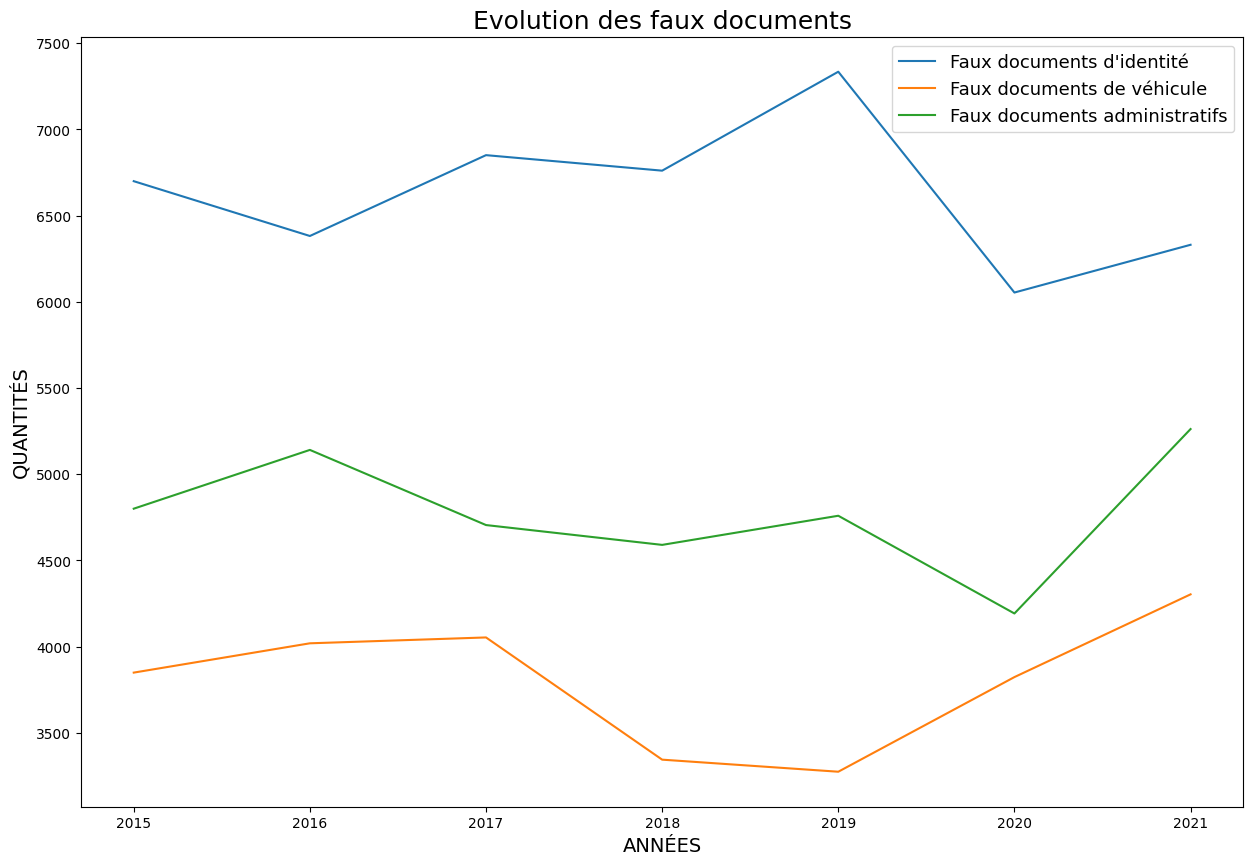

In [21]:
plt.plot(labels, values_80, label = dfObj['Label'][0])
plt.plot(labels, values_81, label = dfObj['Label'][1])
plt.plot(labels, values_82, label = dfObj['Label'][2])

plt.title('Evolution des faux documents', fontsize=18)
plt.xlabel('ANNÉES', fontsize=14)
plt.ylabel('QUANTITÉS', fontsize=14)
plt.legend(fontsize=13)

plt.show()

In [22]:
dfNewObj = pd.DataFrame(columns = ['Label', 'Datas'])

dfNewObj = dfNewObj.append({
  'Label': 'Accident mortel sans permis',
  'Datas': 6
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident non-mortel sans permis',
  'Datas': 4
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident mortel avec permis',
  'Datas': 5
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident non-mortel avec permis',
  'Datas': 85
}, ignore_index = True)

values = dfNewObj['Datas']
colors = ['#E74C3C', '#E67E22', '#9B59B6', '#3498DB']
legends = dfNewObj['Label']

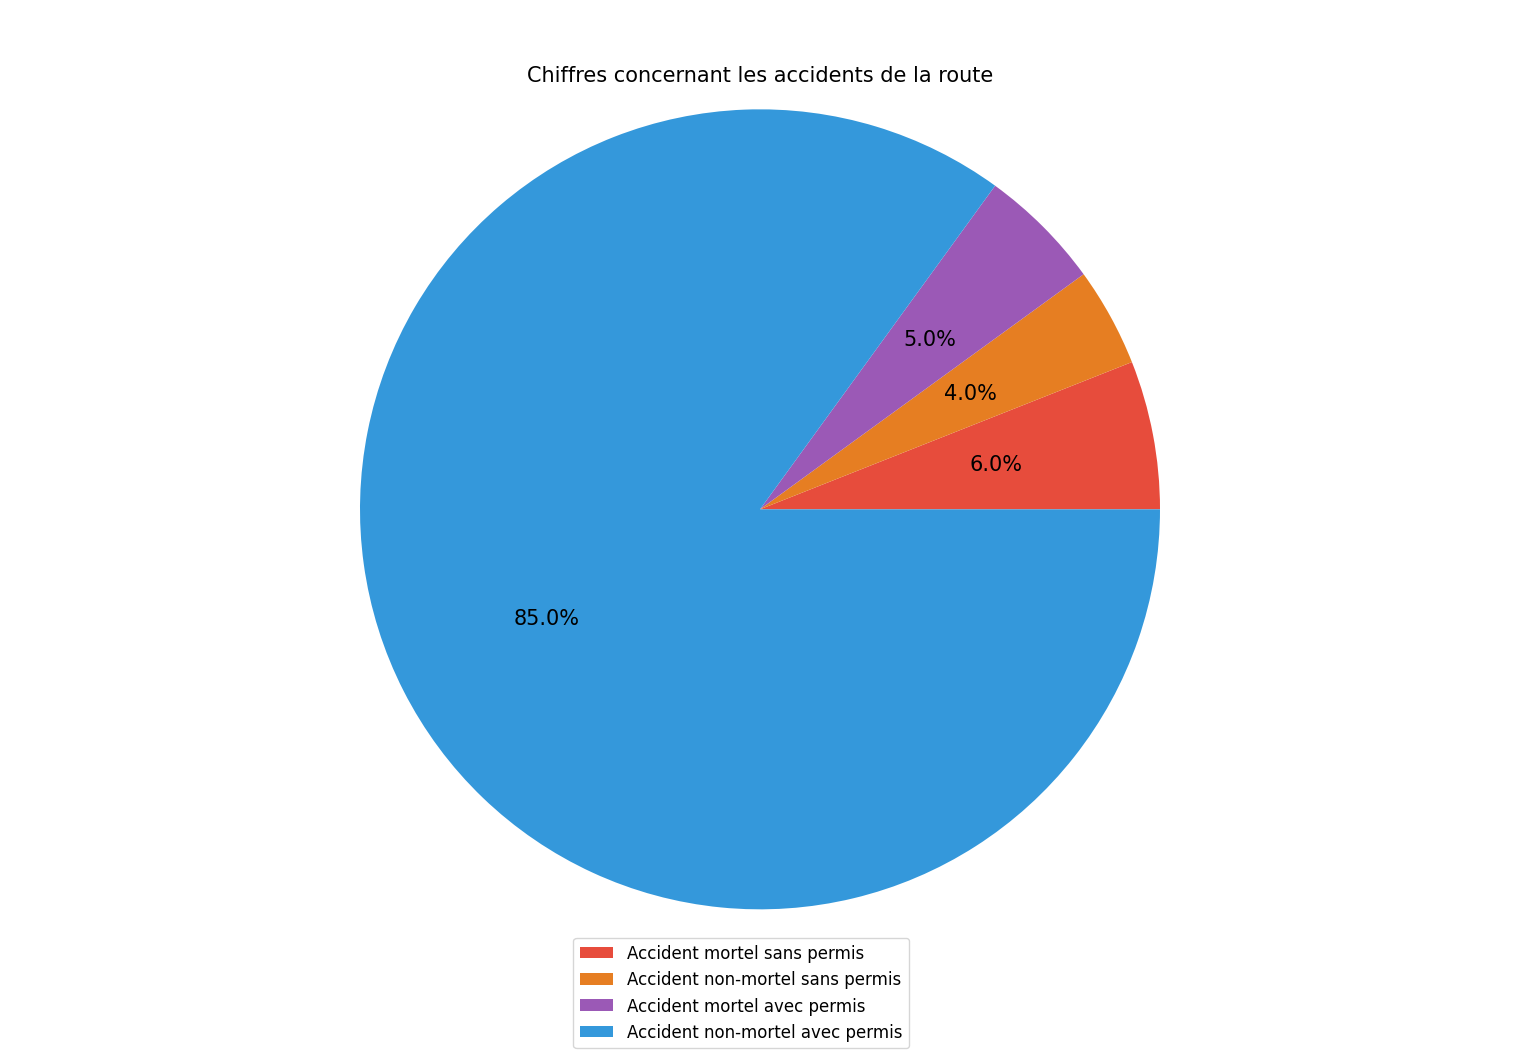

In [23]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

plt.title('Chiffres concernant les accidents de la route', y = 0.92, fontsize = 15)
plt.pie(values, autopct = '%1.1f%%', colors = colors, textprops = { "fontsize" : 15 })
plt.legend(legends, loc = 'upper left', bbox_to_anchor = (0.37, 0.08), fontsize = 12)

plt.show()

#######################################################################################################################################
### Fichier : homicides.ipynb
#######################################################################################################################################

Ce fichier contient les données des homicides de 2015 à 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [24]:
# Read the excel file
homicides_raw = pd.read_excel("data/crimes_mensuels.xlsx", sheet_name="France_Entière")

In [25]:
homicides_i2i3 = homicides_raw.loc[1:2, '_2021_12':'_2015_01']

homicides_i51 = homicides_raw.loc[50:50, '_2021_12':'_2015_01']

homicides_concat = pd.concat([homicides_i2i3, homicides_i51])

# Homicides for the plot
homicides_sum_per_months = homicides_concat.sum(axis=0)

# reversing the dataframe
homicides_sum_per_months = homicides_sum_per_months[::-1]

attempted_homicides_i4i5 = homicides_raw.loc[3:4, '_2021_12':'_2015_01']

# Attempted homicides for the plot
attempted_homicides_sum_per_months = attempted_homicides_i4i5.sum(axis=0)

# reversing the dataframe
attempted_homicides_sum_per_months = attempted_homicides_sum_per_months[::-1]

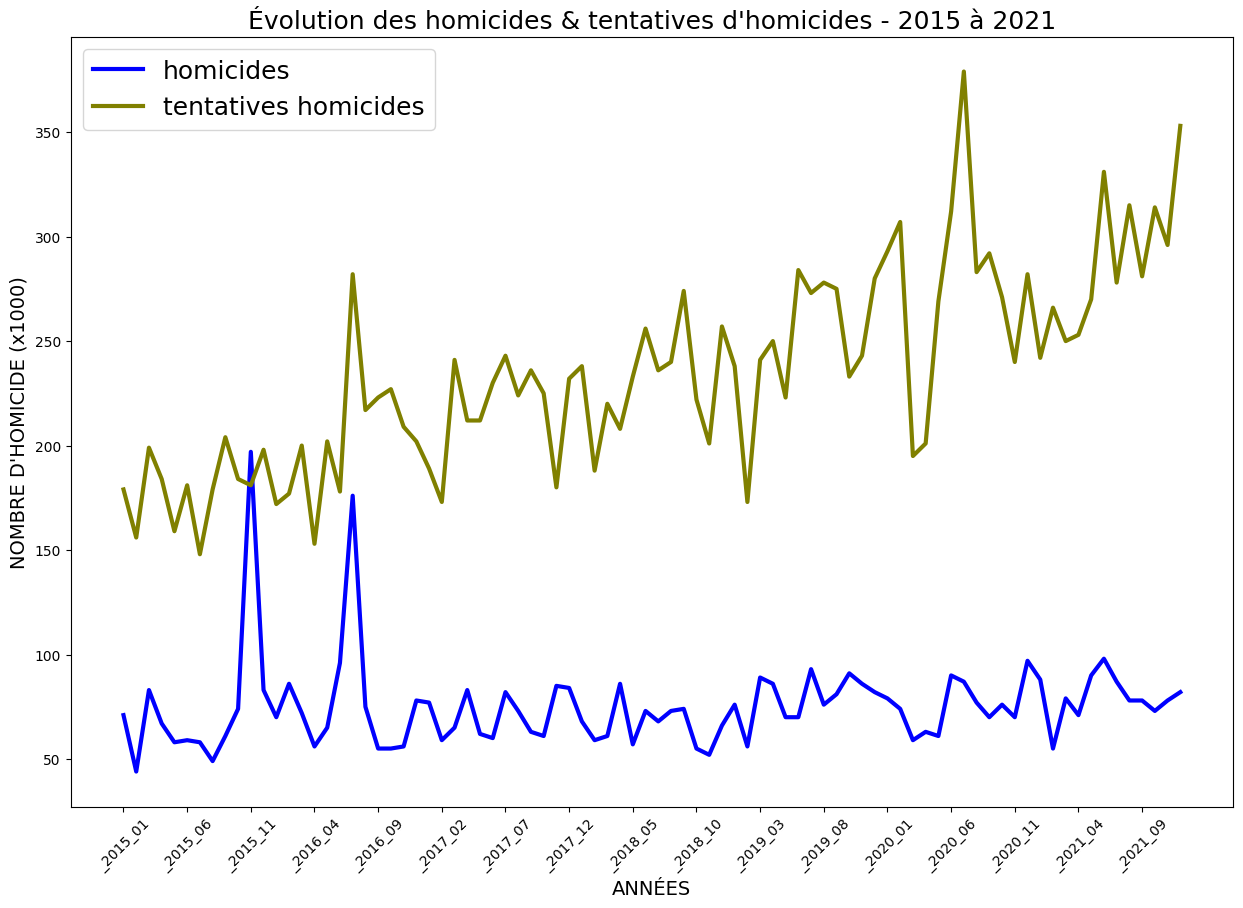

In [26]:
# dataframe for plots
df = pd.DataFrame({
  'period': homicides_sum_per_months.index,
  'homicides': homicides_sum_per_months.values,
  'tentatives homicides': attempted_homicides_sum_per_months.values
})

# multiple line plots
plt.plot( 'period', 'homicides', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.plot( 'period', 'tentatives homicides', data=df, marker='', markersize=12, color='olive', linewidth=3)

# title, ticks
plt.title("Évolution des homicides & tentatives d'homicides - 2015 à 2021", fontsize=18)
plt.xticks(np.arange(0, homicides_sum_per_months.index.size, 5), rotation=45)
plt.ylabel("NOMBRE D'HOMICIDE (x1000)", fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(fontsize=18)

# show graph
plt.show()

#######################################################################################################################################
### Fichier : victimisations_des_ménages.ipynb
#######################################################################################################################################

Ce fichier contient les données des victimisations des ménages de 2010 à 2018. Il se base sur 1 fichier xlsx qui est le suivant : ***indicateur_victimation_et_insécurité.xlsx***

In [27]:
df = pd.read_excel('./data/indicateur_victimation_et_insécurité.xlsx', engine='openpyxl', skiprows=7,nrows=19)
getYears = df[['INDICATEURS/PERIODE', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

In [28]:
violenceOutdoor = getYears.loc[[11, 12]]
violenceOutdoor = pd.Series(violenceOutdoor[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())
violenceOutdoor = pd.DataFrame(violenceOutdoor)

violenceOutdoor.columns=["nombre de victimes de violences physiques/sexuelles hors ménage"]
violenceOutdoor = violenceOutdoor.T
violenceOutdoor = violenceOutdoor.reset_index()
violenceOutdoor =violenceOutdoor.rename({'index': 'INDICATEURS/PERIODE'}, axis=1)

In [29]:
robbery = getYears.iloc[[0,3,4,5,13],:]
robbery = pd.DataFrame(robbery)
robbery = robbery[1:]

df2 =[violenceOutdoor,robbery]
result = pd.concat(df2)

In [30]:
firstTiers = result.iloc[:, 0:4]
firstTiers = pd.DataFrame(firstTiers)
firstTiers['Total'] = firstTiers.sum(axis = 1, numeric_only = True)

secondTiers = result.iloc[:, [0,4,5,6]]
secondTiers = pd.DataFrame(secondTiers)
secondTiers['Total'] = secondTiers.sum(axis = 1, numeric_only = True)

lastTiers = result.iloc[:,[0,7,8,9]]
lastTiers = pd.DataFrame(lastTiers)
lastTiers['Total'] = lastTiers.sum(axis = 1, numeric_only = True)

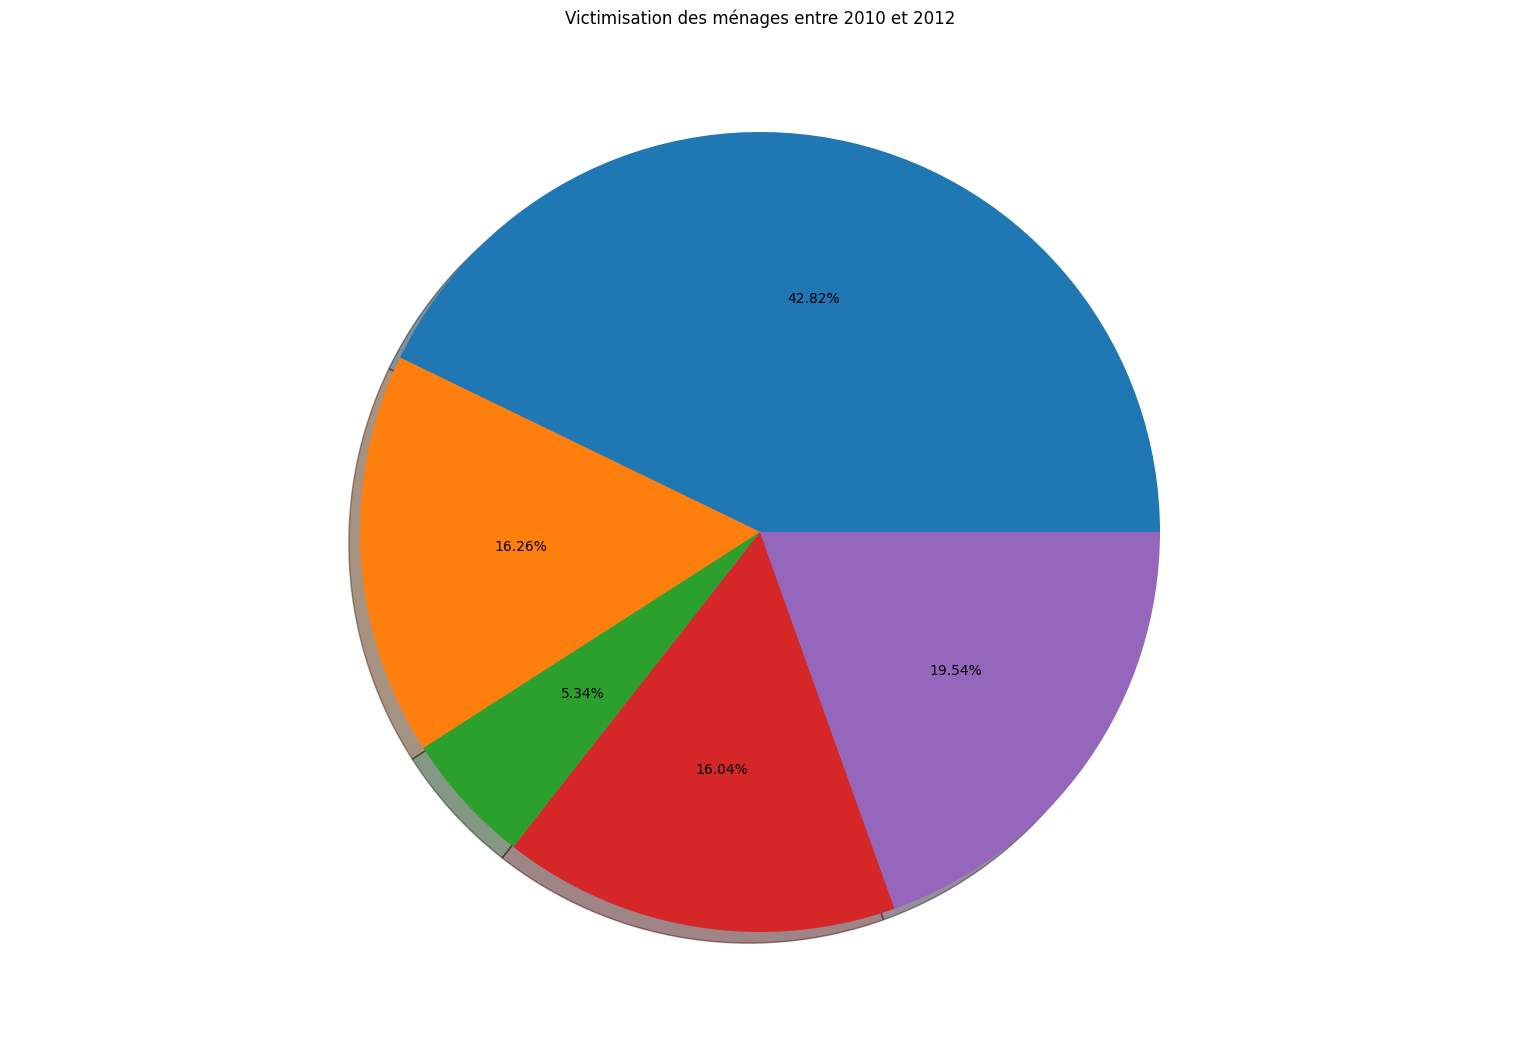

In [31]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = firstTiers["INDICATEURS/PERIODE"]
y= firstTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2010 et 2012")
plt.show()

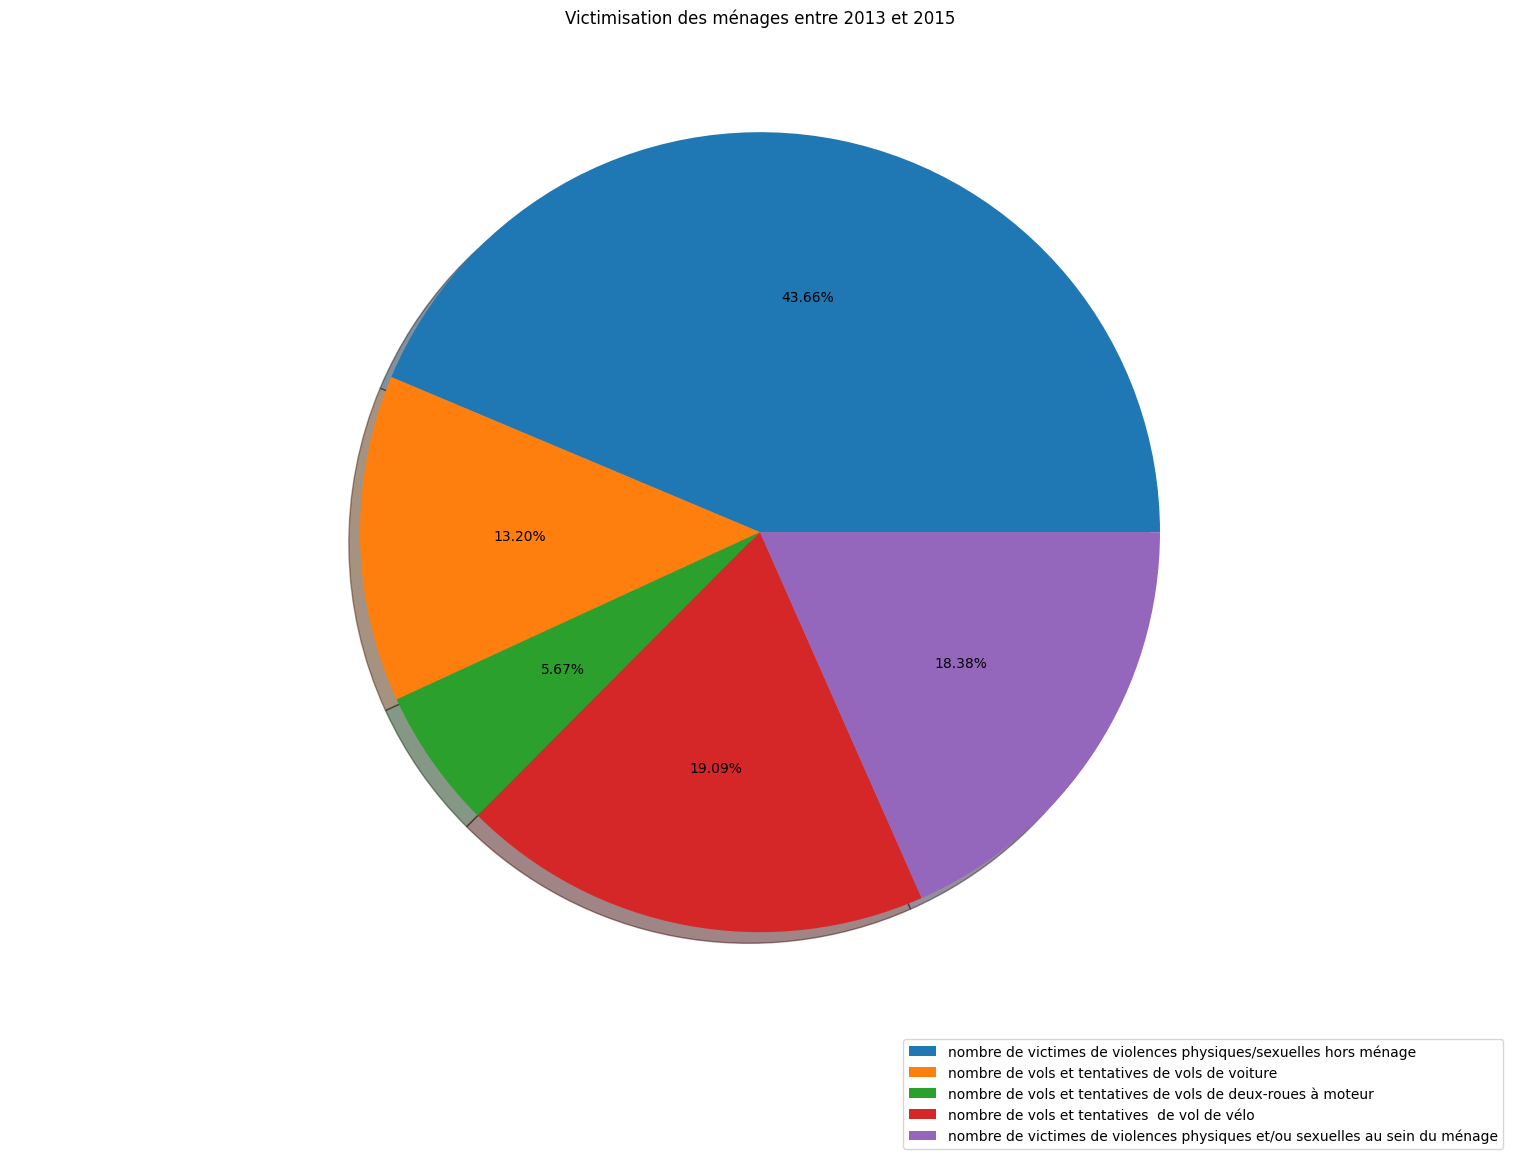

In [32]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = secondTiers["INDICATEURS/PERIODE"]
y= secondTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.legend(x ,bbox_to_anchor=(1,0))
plt.title("Victimisation des ménages entre 2013 et 2015")
plt.show()

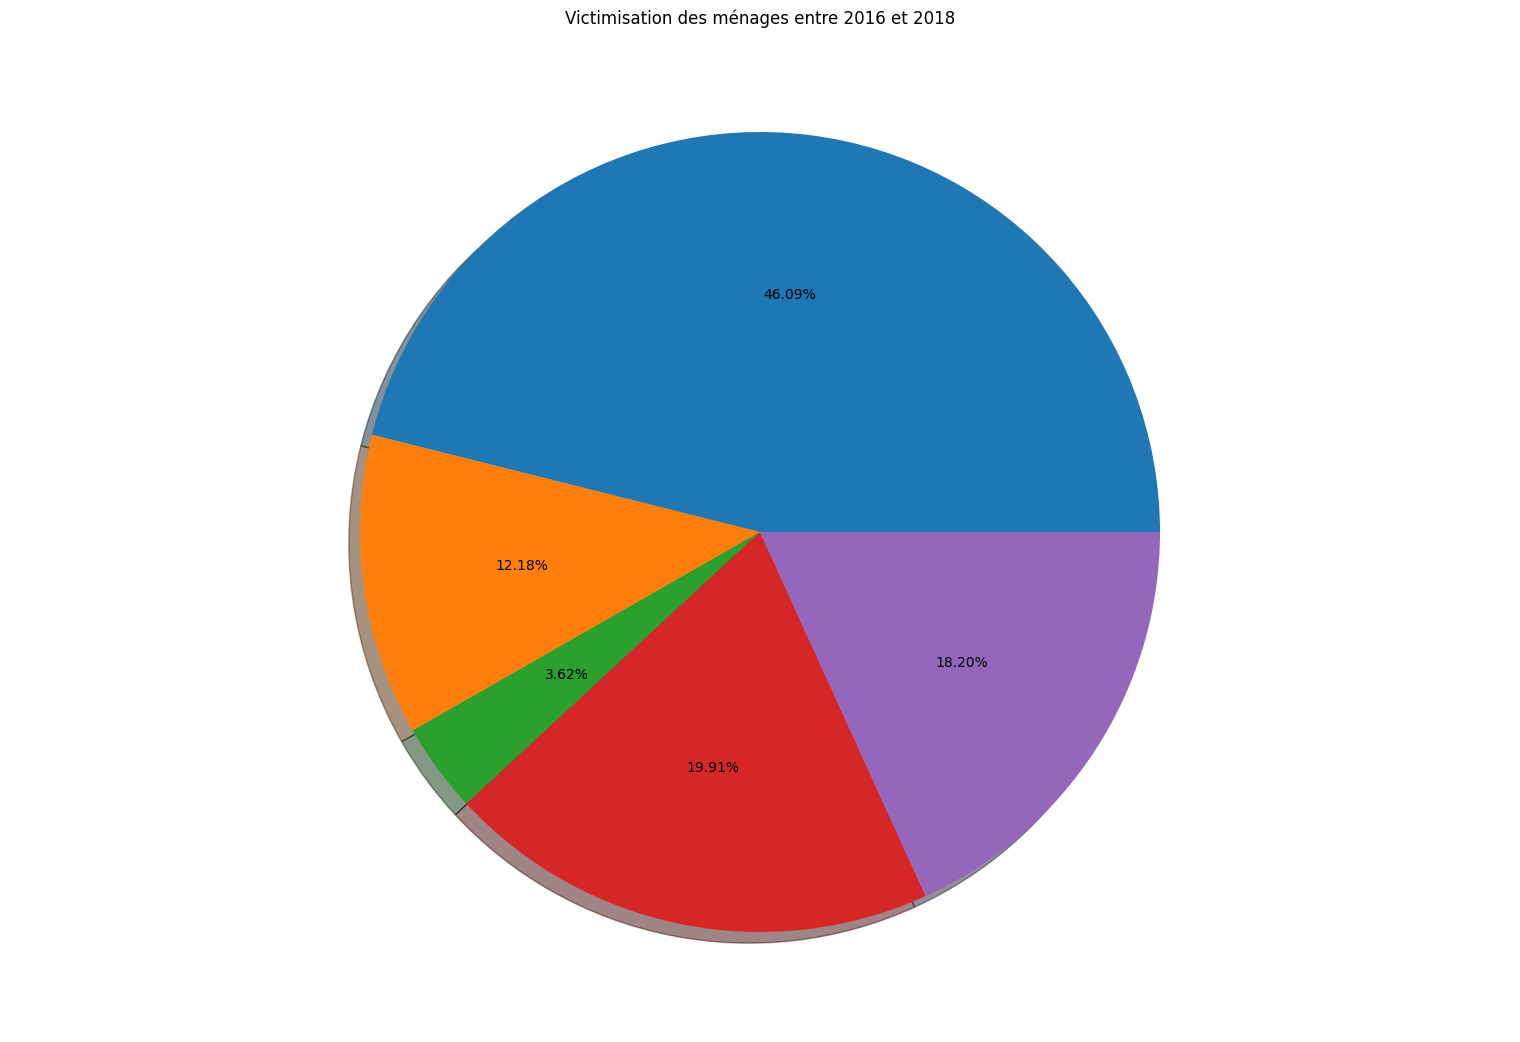

In [33]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = lastTiers["INDICATEURS/PERIODE"]
y= lastTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2016 et 2018")
plt.show()

#######################################################################################################################################
### Fichier : crimes_departements.ipynb
#######################################################################################################################################

Ce fichier contient les données des crimes pour les départements et régions de 2015 à 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [34]:
# Récupération et lecture du fichier xlsx
df_test = pd.ExcelFile('./data/crimes_mensuels.xlsx')
sheet_names = df_test.sheet_names

In [35]:
# récupération des données de chaque département
dict_df = pd.read_excel('./data/crimes_mensuels.xlsx', sheet_name=sheet_names[2:109])

In [36]:
# récupération des données de chaque département
dict_sum_df = {}
dict_sum_total_dep = {}
for key, value in dict_df.items():
    dict_sum_df[key] = []
    current_df = dict_df[key].loc[:,"_2021_12": "_2015_01"]
    dict_sum_df[key] =  current_df.sum()[::-1]
    dict_sum_total_dep[key] = dict_sum_df[key].sum()    
# dict_sum_df["01"].sum()

# dictionnaire des données de chaque département ordonnées par le nombre de crimes
dict_sum_total_dep = {k: v for k, v in sorted(dict_sum_total_dep.items(), key=lambda item: item[1], reverse=True)}

In [37]:
# récuperer les tops premiers départements de crimes
top = 5
dict_top = dict(list(dict_sum_total_dep.items())[0:top])
dict_other = sum(dict(list(dict_sum_total_dep.items())[top:]).values())
dict_top['Autres départements'] = dict_other

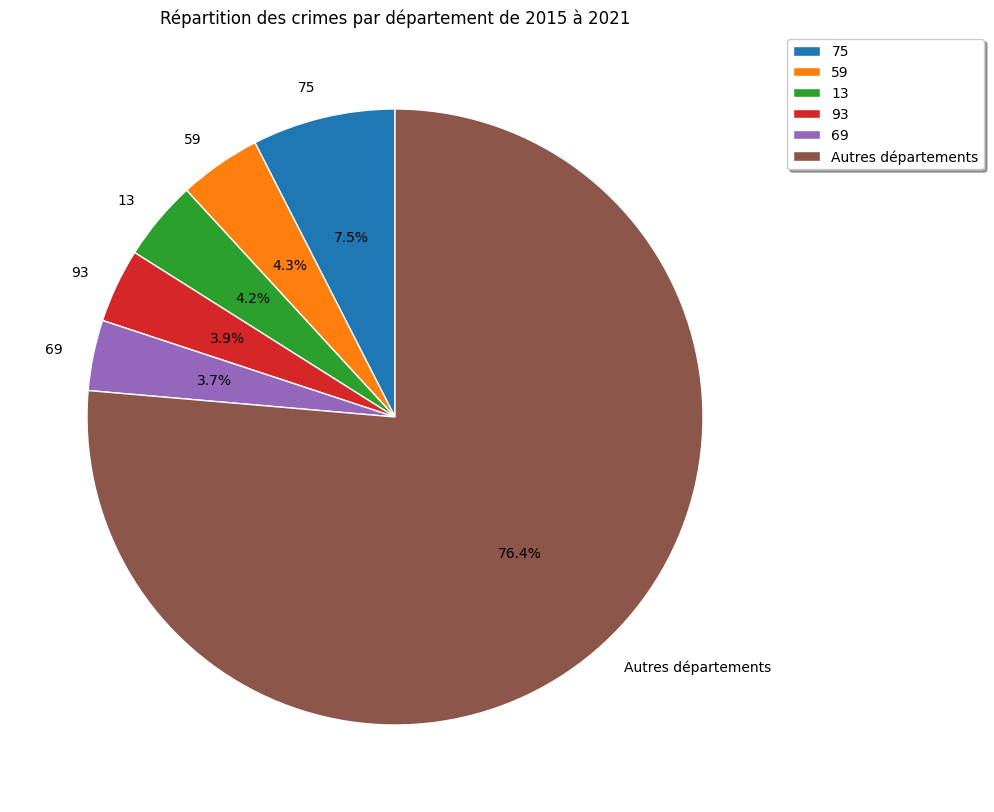

In [38]:
# create data: an array of values

# Create a pieplot
plt.pie(dict_top.values(), labels=dict_top.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.title("Répartition des crimes par département de 2015 à 2021")
plt.show()

In [39]:
# Création d'un dictionnaire des départements par région
dict_region = {"auvergne_rhone_alpes" : ['01', '03', '07', '15', '26', '38', '42', '43', '63','69', '73', '74'],
"bourgogne_franche_comte" : ['21', '25', '39', '58', '70', '71', '89', '90'],
"bretagne" : ['22', '29', '35', '56'],
"centre_val_de_loire" : ['18', '28', '36', '37', '41', '45'],
"corse" : ['2B', '2A'],
"grand_est" : ['08', '10', '51', '52', '54', '55', '57', '88'],
"hauts_de_france" : ['02', '59', '60', '62', '80'],
"ile_de_france" : ['75', '77', '78', '91', '92', '93', '94', '95'],
"normandie" : ['14', '27', '50', '61', '76'],
"nouvelle_aquitaine" : ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
"occitanie" : ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
"pays_de_la_loire" : ['44', '49', '53', '72', '85'],
"provence_alpes_cote_azur" : ['04', '05', '06', '13', '83', '84'],
"dom_tom": ['971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']
}

In [40]:
# Récupération des données de crimes par région pour les années 2015 à 2021
dict_sum_total_region = {}
for key, value in dict_region.items():
  dict_sum_total_region[key] = 0
  for dep in value:
    dict_sum_total_region[key] += dict_sum_total_dep[dep]

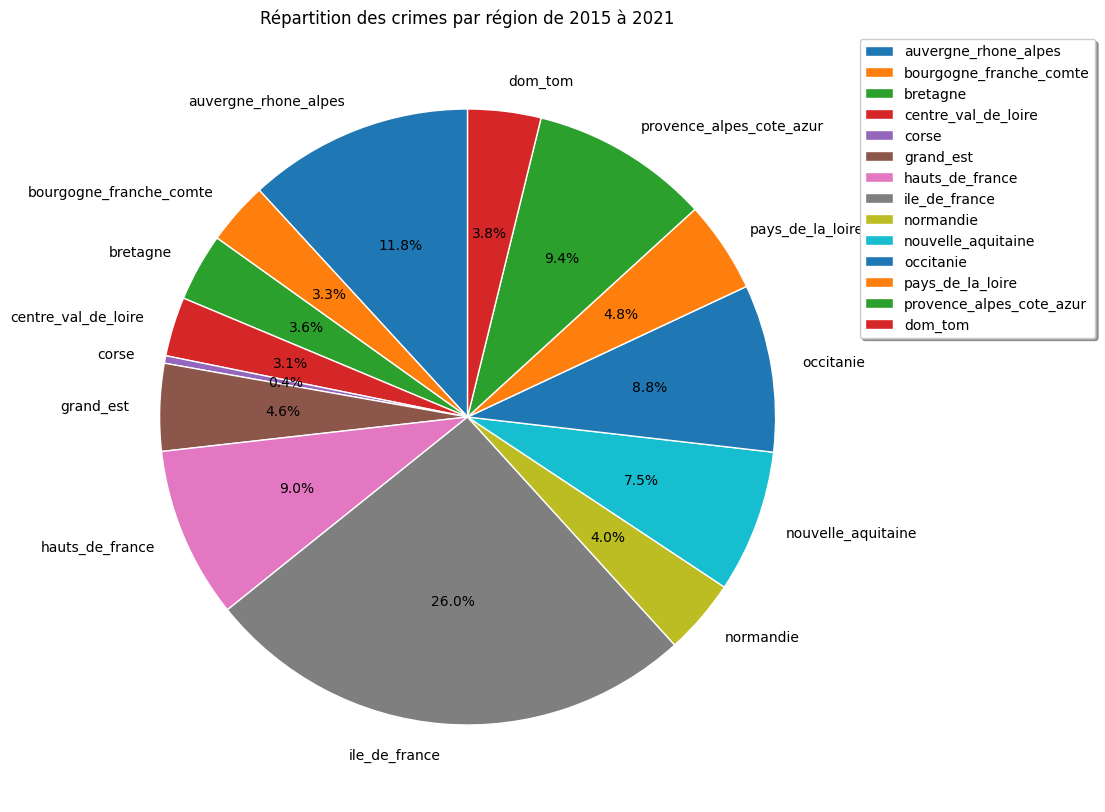

In [41]:
# Création de graphique en camembert par région
plt.pie(dict_sum_total_region.values(), labels=dict_sum_total_region.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.title("Répartition des crimes par région de 2015 à 2021")
plt.show()

#######################################################################################################################################
### Fichier : effectif_police.ipynb
#######################################################################################################################################

Ce fichier contient les données des effectifs de la police de 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***donnees-effectifs-polices-municipales-2021.xlsx***

In [42]:
# Read the excel file
df_2021 = pd.read_excel("data/donnees-effectifs-polices-municipales-2021.xlsx", sheet_name="II)_Communes")

In [43]:
datas_extract = df_2021.iloc[4:]

# Get columns names
columns = datas_extract.iloc[0].values
columns[3] = "Nom des communes ou EPCI ayant un service de police municipale"
columns[4] = "Nombre d’habitants de la commune"
columns[5] = "Mise en commun d'agents de police municipale entre communes"
columns[6] = "Nombre d’agents de police municipale"
columns[7] = "Nombre d’ASVP (à Paris, nombre d’ASP et contrôleurs)"
columns[8] = "Nombre de gardes-champêtres"

# Get rows
rows = datas_extract.iloc[2:].values

# Create new DataFrame
datas_clean = pd.DataFrame(rows, columns=columns)

In [44]:
# Datas per departments and national
national_row = datas_clean.loc[4722]

dict_totaux = {};
dept = '1'
for key, row in datas_clean.iterrows():
    if type(row['Numéro département']) == str:
        if 'TOTAL' in row['Numéro département']:
            dict_totaux[row['Numéro département']] = row
            dict_totaux[row['Numéro département']]['dept'] = dept
    else:
        dept=row['Numéro département']


In [45]:
# Création d'un dictionnaire des départements par région
dict_region = {"auvergne_rhone_alpes" : ['1', '3', '7', '15', '26', '38', '42', '43', '63','69', '73', '74'],
"bourgogne_franche_comte" : ['21', '25', '39', '58', '70', '71', '89', '90'],
"bretagne" : ['22', '29', '35', '56'],
"centre_val_de_loire" : ['18', '28', '36', '37', '41', '45'],
"corse" : ['2B', '2A'],
"grand_est" : ['8', '10', '51', '52', '54', '55', '57', '88'],
"hauts_de_france" : ['2', '59', '60', '62', '80'],
"ile_de_france" : ['75', '77', '78', '91', '92', '93', '94', '95'],
"normandie" : ['14', '27', '50', '61', '76'],
"nouvelle_aquitaine" : ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
"occitanie" : ['9', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
"pays_de_la_loire" : ['44', '49', '53', '72', '85'],
"provence_alpes_cote_azur" : ['4', '5', '6', '13', '83', '84'],
"dom_tom": ['971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']
}

In [46]:
# Récupération des données de crimes par région pour 2021
dict_total_region = {}
for key, value in dict_totaux.items():
    dept = dict_totaux[key]['dept']
    dict_total_region[dept] = 0
    for dep in value:
        total = dict_totaux[key]["Nombre d’agents de police municipale"]
        dict_total_region[dept] = total
        
# dict_region
dict_total_region

dict_police_per_region = {}
for key, value in dict_region.items():
    dict_police_per_region[key] = 0
    for dep in value:
        for dept, eff_police in dict_total_region.items():
            if(str(dept) == str(dep)):
                dict_police_per_region[key] += eff_police
            if(str(dept) == '2A' or str(dept) == '2B'):
                dict_police_per_region['corse'] += eff_police
            #dict_police_per_region[key] = 

dict_police_per_region
# dictionnaire des données de chaque département ordonnées
dict_sum_total_dep = {k: v for k, v in sorted(dict_police_per_region.items(), key=lambda item: item[1], reverse=True)}


In [47]:
# récuperer les tops premiers départements de crimes
top = 5
dict_top = dict(list(dict_sum_total_dep.items())[0:top])
dict_other = sum(dict(list(dict_sum_total_dep.items())[top:]).values())
dict_top['Autres régions'] = dict_other

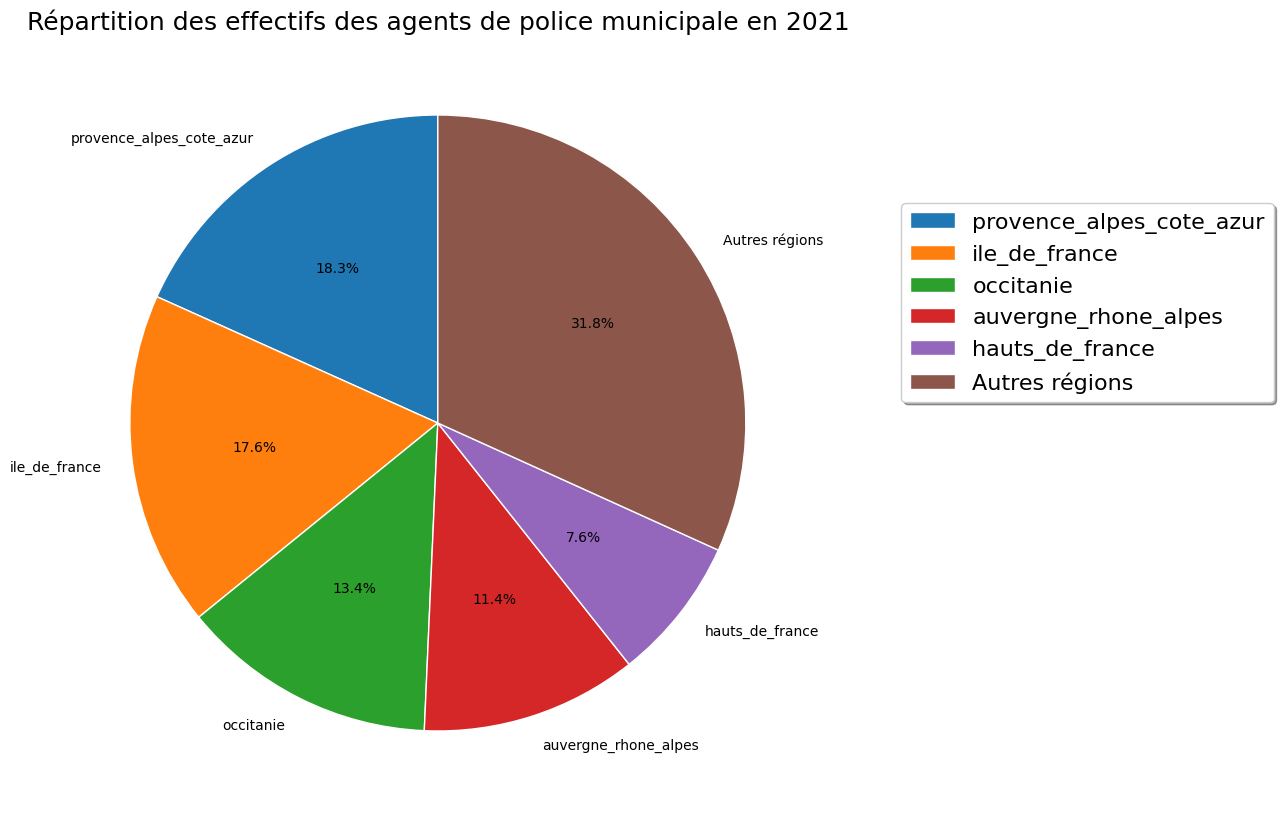

In [48]:
# Create a pieplot
plt.pie(dict_top.values(), labels=dict_top.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1.6, 0.8), shadow=True, ncol=1, fontsize=16)
plt.title("Répartition des effectifs des agents de police municipale en 2021", fontsize=18)
plt.show()

#######################################################################################################################################
### Fichier : crimes_departements.ipynb
#######################################################################################################################################

Ce fichier contient une carte de la france avec des points représentés par les départements les plus concernés par les crimes de 2015 à 2021 avec la librairie folium et plotly. Il se base sur 1 fichier geojson qui est le suivant : ***departements.geojson***

In [49]:
# centre = [40.71427, -74.00597]
# newyork = folium.Map(location = centre, zoom_start = 12)
# newyork
france = folium.Map(location=[46.2276, 2.2137], zoom_start=6)
france.choropleth(
    geo_data='./data/geojson/departements.geojson',
    data=dict_sum_total_dep,
    columns=[dict_sum_total_dep.keys(), dict_sum_total_dep.values()],
    key_on='feature.properties.code',
    fill_color='YlOrRd',
    # fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Nombre de crimes par département de 2015 à 2021',
    highlight=True
)
france

C:\Users\hfief\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [50]:
# Création d'un dictionnaire des départements par région par année

# dict_region_year = {}
# for key, value in dict_region.items():
#     dict_region_year[key] = {}
#     for year in range(2015, 2022):
#         dict_region_year[key][year] = 0
#         for dep in value:
#             dict_region_year[key][year] += dict_sum_df[dep][year]
# dict_region_year

# transformer chaque département en dataframe pour pouvoir faire des calculs
dict_df = {}
for key, value in dict_sum_df.items():
    dict_df[key] = pd.DataFrame(value)
    dict_df[key].columns = ["Nombre de crimes"]
    dict_df[key]["Année"] = dict_df[key].index
    dict_df[key]["Année"] = dict_df[key]["Année"].apply(lambda x: x[1:])
    dict_df[key]["Année"] = dict_df[key]["Année"].apply(lambda x: x.replace("_", "-"))
    dict_df[key]["Année"] = pd.to_datetime(dict_df[key]["Année"], format='%Y-%m')
    dict_df[key]["Année"] = dict_df[key]["Année"].dt.year
    dict_df[key] = dict_df[key].set_index("Année")
    dict_df[key] = dict_df[key].sort_index()
    dict_df[key]["Nombre de crimes"] = dict_df[key]["Nombre de crimes"].apply(lambda x: int(x))

# fusionner les départements en une seule dataframe avec une colonne "Département"
df_nombre_crime_departement_annee = pd.DataFrame()
for key, value in dict_df.items():
    value["Département"] = key
    df_nombre_crime_departement_annee = pd.concat([df_nombre_crime_departement_annee, value])
df_nombre_crime_departement_annee = df_nombre_crime_departement_annee.reset_index()
df_nombre_crime_departement_annee = df_nombre_crime_departement_annee.rename(columns={"index": "Année"})

In [51]:
# fusionner les crime de la meme année et du meme département
df_nombre_crime_departement_annee = df_nombre_crime_departement_annee.groupby(["Année", "Département"]).sum()
df_nombre_crime_departement_annee = df_nombre_crime_departement_annee.reset_index()
df_nombre_crime_departement_annee = df_nombre_crime_departement_annee.set_index("Année")

In [52]:
# Carte interactive des crimes par année et par département
fig = px.choropleth(df_nombre_crime_departement_annee, locations="Département", locationmode="USA-states", color="Nombre de crimes", hover_name="Département", animation_frame=df_nombre_crime_departement_annee.index, color_continuous_scale=px.colors.sequential.YlOrRd, range_color=[0, 10000])
fig.update_layout(title_text="Nombre de crimes par année et par département", title_x=0.5)
fig.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#######################################################################################################################################
### Fichier Non Utilisé : pauvrete.ipynb
#######################################################################################################################################

Ce fichier contient les données de la pauvreté de 1995 à 2020. Il se base sur 1 fichier xlsx qui est le suivant : ***taux_pauvrete.xlsx***

In [53]:
# Read the excel file
data_raw = pd.read_excel("data/taux_pauvrete.xlsx", sheet_name="ERFS_TPA60_06")

In [54]:
datas_extract = data_raw.iloc[2:11]

# Get columns names
columns = datas_extract.iloc[0].values

# Get rows
rows = datas_extract.iloc[1:10].values

In [55]:
# Create new DataFrame
datas_clean = pd.DataFrame(rows, columns=columns)

datas_clean = datas_clean.drop(columns=['2012 (2)', '2010 (1)'])

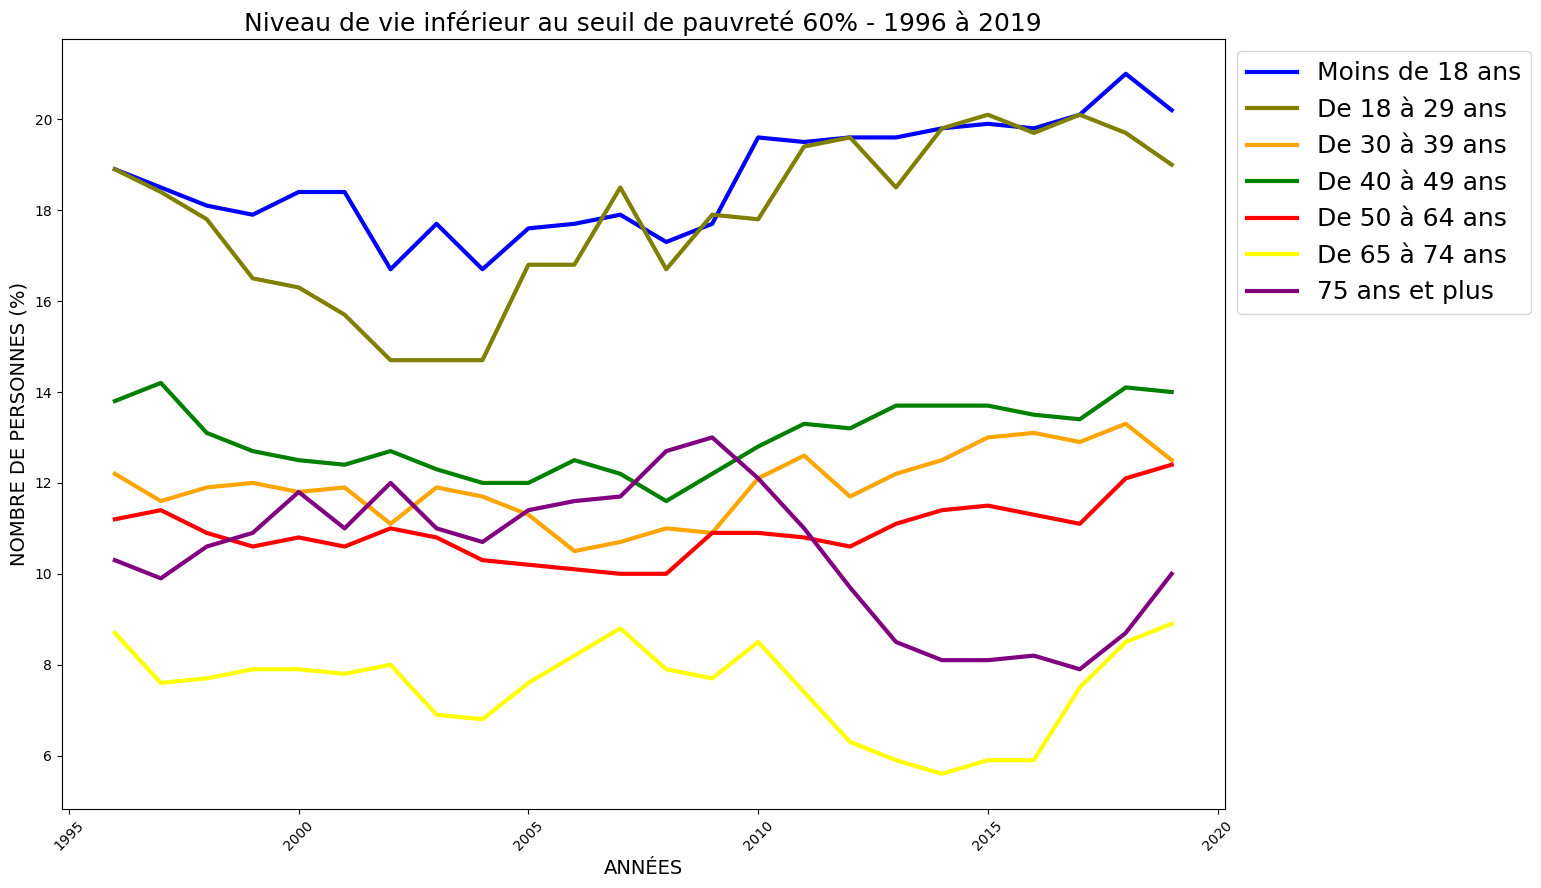

In [56]:
# dataframe for plots
plot1 = datas_clean.loc[0, 1996:2019]
plot2 = datas_clean.loc[1, 1996:2019]
plot3 = datas_clean.loc[2, 1996:2019]
plot4 = datas_clean.loc[3, 1996:2019]
plot5 = datas_clean.loc[4, 1996:2019]
plot6 = datas_clean.loc[5, 1996:2019]
plot7 = datas_clean.loc[6, 1996:2019]

df = pd.DataFrame({
  'Années': plot1.index,
  'Moins de 18 ans': plot1.values,
  'De 18 à 29 ans': plot2.values,
  'De 30 à 39 ans': plot3.values,
  'De 40 à 49 ans': plot4.values,
  'De 50 à 64 ans': plot5.values,
  'De 65 à 74 ans': plot6.values,
  '75 ans et plus': plot7.values,
})

# multiple line plots
plt.plot( 'Années', 'Moins de 18 ans', data=df, marker='', markersize=12, color='blue', linewidth=3)
plt.plot( 'Années', 'De 18 à 29 ans', data=df, marker='', markersize=12, color='olive', linewidth=3)
plt.plot( 'Années', 'De 30 à 39 ans', data=df, marker='', markersize=12, color='orange', linewidth=3)
plt.plot( 'Années', 'De 40 à 49 ans', data=df, marker='', markersize=12, color='green', linewidth=3)
plt.plot( 'Années', 'De 50 à 64 ans', data=df, marker='', markersize=12, color='red', linewidth=3)
plt.plot( 'Années', 'De 65 à 74 ans', data=df, marker='', markersize=12, color='yellow', linewidth=3)
plt.plot( 'Années', '75 ans et plus', data=df, marker='', markersize=12, color='purple', linewidth=3)

# title, ticks, labels
plt.title("Niveau de vie inférieur au seuil de pauvreté 60% - 1996 à 2019", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('NOMBRE DE PERSONNES (%)', fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(bbox_to_anchor=(1,1), fontsize=18)

# show graph
plt.show()